In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import regex as re

from bs4 import BeautifulSoup

In [2]:
url = 'https://www.pro-football-reference.com/years/2019/passing.htm'

In [3]:
html = requests.get(url).content
soup= BeautifulSoup(html, 'lxml')


In [4]:
## Table header 

table_header = soup.find_all('tr')[0]
table_header = [i.getText() for i in table_header.find_all('th')]

In [5]:
#getting rows

rows = soup.find_all('tr')[1:] 

#stats for rows

qb_stats = []

for i in range(len(rows)):
    qb_stats.append([col.getText() for col in rows[i].find_all('td')])

In [6]:
# Make it a dataframe

df = pd.DataFrame(qb_stats, columns=table_header[1:])
df.head()

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,...,Y/G,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD
0,Jared Goff,LAR,25,QB,16,16,9-7-0,394,626,62.9,...,289.9,86.5,50.2,22,170,6.90,6.46,3.4,1,2
1,Jameis Winston,TAM,25,QB,16,16,7-9-0,380,626,60.7,...,319.3,84.3,59.1,47,282,7.17,6.15,7.0,2,2
2,Matt Ryan,ATL,34,QB,15,15,7-8-0,408,616,66.2,...,297.7,92.1,60.4,48,316,6.25,6.08,7.2,3,2
3,Tom Brady,NWE,42,QB,16,16,12-4-0,373,613,60.8,...,253.6,88.0,54.5,27,185,6.05,6.24,4.2,1,1
4,Carson Wentz,PHI,27,QB,16,16,9-7-0,388,607,63.9,...,252.4,93.1,64.8,37,230,5.91,6.26,5.7,2,4


In [7]:
df.columns

#we have two columns with the same name, yds in index 11, refers to yds 
#forward,  yds on -6 are yards when sacked, which can be backwards
#

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'NY/A', 'ANY/A', 'Sk%', '4QC',
       'GWD'],
      dtype='object')

In [8]:
# rename
#df.rename(columns={df.columns[-6]:'Yds_sack'}, inplace=True)
new_col = df.columns.values
new_col[-6] = 'Yds_sack'
df.columns = new_col

#first one didnt work, it was changing all both values so I made a new 
#column

In [9]:
df.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds_sack', 'NY/A', 'ANY/A', 'Sk%', '4QC',
       'GWD'],
      dtype='object')

In [10]:
# getting all the categories to use

cat  = ['Cmp%', 'Yds', 'TD', 'Int', 'Y/A', 'Rate']

In [11]:
t_color = {'ARI':'#97233f', 'ATL':'#a71930', 'BAL':'#241773', 'BUF':'#00338d',
               'CAR':'#0085ca', 'CHI':'#0b162a', 'CIN':'#fb4f14', 'CLE':'#311d00',
               'DAL':'#041e42', 'DEN':'#002244', 'DET':'#0076b6', 'GNB':'#203731',
               'HOU':'#03202f', 'IND':'#002c5f', 'JAX':'#006778', 'KAN':'#e31837',
               'LAC':'#002a5e', 'LAR':'#003594', 'MIA':'#008e97', 'MIN':'#4f2683',
               'NWE':'#002244', 'NOR':'#d3bc8d', 'NYG':'#0b2265', 'NYJ':'#125740',
               'OAK':'#000000', 'PHI':'#004c54', 'PIT':'#ffb612', 'SFO':'#aa0000',
               'SEA':'#002244', 'TAM':'#d50a0a', 'TEN':'#0c2340', 'WAS':'#773141'}

In [12]:
#make subset for the radar chart

radar = df[['Player', 'Tm'] + cat]
radar.head()

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate
0,Jared Goff,LAR,62.9,4638,22,16,7.4,86.5
1,Jameis Winston,TAM,60.7,5109,33,30,8.2,84.3
2,Matt Ryan,ATL,66.2,4466,26,14,7.3,92.1
3,Tom Brady,NWE,60.8,4057,24,8,6.6,88.0
4,Carson Wentz,PHI,63.9,4039,27,7,6.7,93.1


In [13]:
radar['Tm'].value_counts()

CAR    5
WAS    5
DEN    5
DET    4
LAR    4
NOR    4
MIA    4
NYJ    4
NWE    4
PIT    4
KAN    3
ARI    3
HOU    3
NYG    3
BUF    3
CIN    3
PHI    3
TEN    3
MIN    3
BAL    3
ATL    3
IND    3
CLE    3
JAX    3
LAC    2
DAL    2
SFO    2
2TM    2
TAM    2
CHI    2
GNB    2
OAK    2
SEA    1
Name: Tm, dtype: int64

In [14]:
radar.dtypes

Player    object
Tm        object
Cmp%      object
Yds       object
TD        object
Int       object
Y/A       object
Rate      object
dtype: object

In [15]:
# change data to numerical

for i in cat:
    radar[i] = pd.to_numeric(df[i])

/home/emmanuel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
radar.dtypes

Player     object
Tm         object
Cmp%      float64
Yds       float64
TD        float64
Int       float64
Y/A       float64
Rate      float64
dtype: object

In [17]:
radar

#there are some special characters in the table

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate
0,Jared Goff,LAR,62.9,4638.0,22.0,16.0,7.4,86.5
1,Jameis Winston,TAM,60.7,5109.0,33.0,30.0,8.2,84.3
2,Matt Ryan,ATL,66.2,4466.0,26.0,14.0,7.3,92.1
3,Tom Brady,NWE,60.8,4057.0,24.0,8.0,6.6,88.0
4,Carson Wentz,PHI,63.9,4039.0,27.0,7.0,6.7,93.1
...,...,...,...,...,...,...,...,...
100,Emmanuel Sanders,2TM,100.0,35.0,1.0,0.0,35.0,158.3
101,Steven Sims,WAS,0.0,0.0,0.0,0.0,0.0,39.6
102,Courtland Sutton *,DEN,100.0,38.0,0.0,0.0,38.0,118.7
103,Alex Tanney,NYG,100.0,1.0,0.0,0.0,1.0,79.2


In [18]:
#radar['Player'] = radar['Player'].str.replace(['+', ''])
#radar['Player'] = radar['Player'].str.replace(['*', ''])

#Itried to do it using regex and didnt work,
# i used replace and still didnt work so I'll
#try doing in it with the special character still in them

On this list there are players that dont even play as qb, as long as players
has passed a ball, it is on the list

In [19]:
# Filter passer

pass_filt = radar[radar['Yds'] > 1500]

In [20]:
#Lets see the best players based on the stats they have

#rank on percentile

#here im creating and appending the percentile of each column
for i in cat:
    pass_filt[i+'_Percent'] = pass_filt[i].rank(pct=True)
    
 # .rank   
#Compute numerical data ranks (1 through n) along axis.
#By default, equal values are assigned a rank that is the average of
#the ranks of those values.

/home/emmanuel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [21]:
pass_filt.head()

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate,Cmp%_Percent,Yds_Percent,TD_Percent,Int_Percent,Y/A_Percent,Rate_Percent
0,Jared Goff,LAR,62.9,4638.0,22.0,16.0,7.4,86.5,0.43750,0.9375,0.500000,0.890625,0.593750,0.343750
1,Jameis Winston,TAM,60.7,5109.0,33.0,30.0,8.2,84.3,0.15625,1.0000,0.968750,1.000000,0.859375,0.203125
2,Matt Ryan,ATL,66.2,4466.0,26.0,14.0,7.3,92.1,0.81250,0.8750,0.718750,0.828125,0.562500,0.593750
3,Tom Brady,NWE,60.8,4057.0,24.0,8.0,6.6,88.0,0.18750,0.8125,0.609375,0.453125,0.140625,0.453125
4,Carson Wentz,PHI,63.9,4039.0,27.0,7.0,6.7,93.1,0.50000,0.7500,0.843750,0.406250,0.234375,0.625000


In [22]:
# The int_percent its way too high

#so we have to flip the interception rank

pass_filt['Int_Percent'] = 1 - pass_filt['Int_Percent']

/home/emmanuel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [23]:
pass_filt.head()

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate,Cmp%_Percent,Yds_Percent,TD_Percent,Int_Percent,Y/A_Percent,Rate_Percent
0,Jared Goff,LAR,62.9,4638.0,22.0,16.0,7.4,86.5,0.43750,0.9375,0.500000,0.109375,0.593750,0.343750
1,Jameis Winston,TAM,60.7,5109.0,33.0,30.0,8.2,84.3,0.15625,1.0000,0.968750,0.000000,0.859375,0.203125
2,Matt Ryan,ATL,66.2,4466.0,26.0,14.0,7.3,92.1,0.81250,0.8750,0.718750,0.171875,0.562500,0.593750
3,Tom Brady,NWE,60.8,4057.0,24.0,8.0,6.6,88.0,0.18750,0.8125,0.609375,0.546875,0.140625,0.453125
4,Carson Wentz,PHI,63.9,4039.0,27.0,7.0,6.7,93.1,0.50000,0.7500,0.843750,0.593750,0.234375,0.625000


In [24]:
## creating the angles for the radar

offset = np.pi/6
angles= np.linspace(0, 2*np.pi, len(cat)+1) + offset

In [25]:
#radar chart


def chart_maker(ax, angles, player, color='blue'):
    
    
    ax.plot(angles, np.append(player[-(len(angles) -1) :], player[-(len(angles)-1)]),linewidth=2)
    ax.fill(angles, np.append(player[-(len(angles)-1):], player[-(len(angles)-1)]), alpha=0.2)
    
    #category labels
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(cat)
    
    
    #remove lables
    ax.set_yticklabels([])
    
    
    #putting the name of the player analized
    
    ax.text(np.pi/2, 1.7, player[0], ha='center', va= 'center', size=18)
    
    #grid
    ax.grid(color='white', linewidth=1.5)
    
    #limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0,1))
    return ax

In [26]:
## getting the qb data

def qb_skills(df, team):
    return np.asarray(df[df['Tm'] == team])[0]

## WEST division

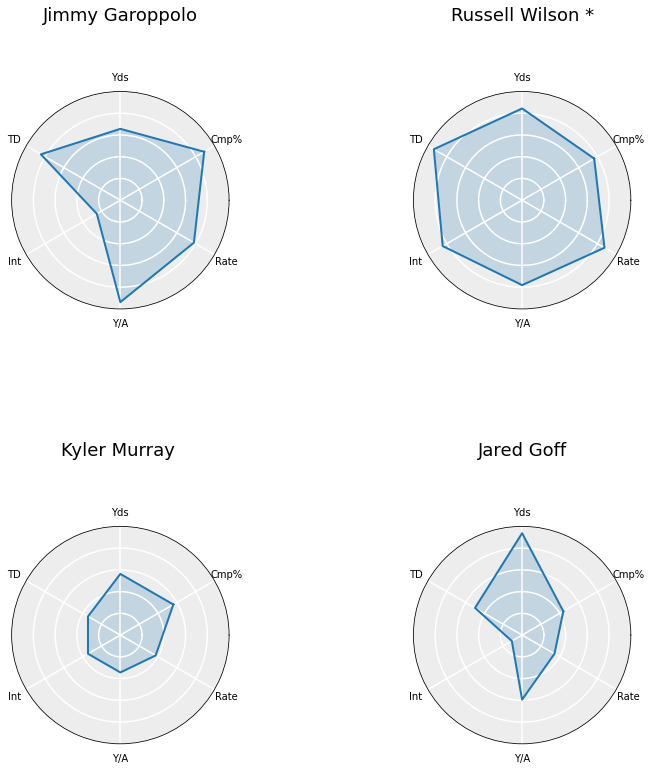

<Figure size 432x288 with 0 Axes>

In [31]:


fig = plt.figure(figsize=(12,12), facecolor='white')

#subplotting

ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

#I had to separate the plots the names were getting inside one to another
plt.subplots_adjust(hspace=1, wspace=0.5)


# division only takes sfo, sea, ari, lar

sfo_qb=qb_skills(pass_filt, 'SFO')
sea_qb=qb_skills(pass_filt, 'SEA')
ari_qb=qb_skills(pass_filt, 'ARI')
lar_qb=qb_skills(pass_filt, 'LAR')


ax1 = chart_maker(ax1, angles, sfo_qb, color='burgundy')
ax2 = chart_maker(ax2, angles, sea_qb, color='blue')
ax3 = chart_maker(ax3, angles, ari_qb, color='red')
ax4 = chart_maker(ax4, angles, lar_qb, color='lightblue')

plt.show()
plt.savefig('./Figures/west.pdf')


# MVP candidates

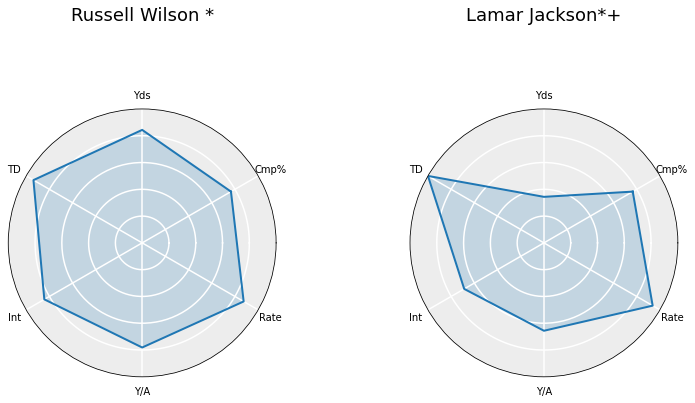

<Figure size 432x288 with 0 Axes>

In [30]:



fig = plt.figure(figsize=(12,12), facecolor='white')

ax1 = fig.add_subplot(121, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(122, projection='polar', facecolor='#ededed')


#giving them space
plt.subplots_adjust(hspace=0.8, wspace=0.5)

bal_qb = qb_skills(pass_filt, 'BAL')
sea_qb = qb_skills(pass_filt, 'SEA')

ax1 = chart_maker(ax1, angles, sea_qb)
ax2 = chart_maker(ax2, angles, bal_qb)

plt.show()
plt.savefig('./Figures/Mvp.pdf')

# Best in history

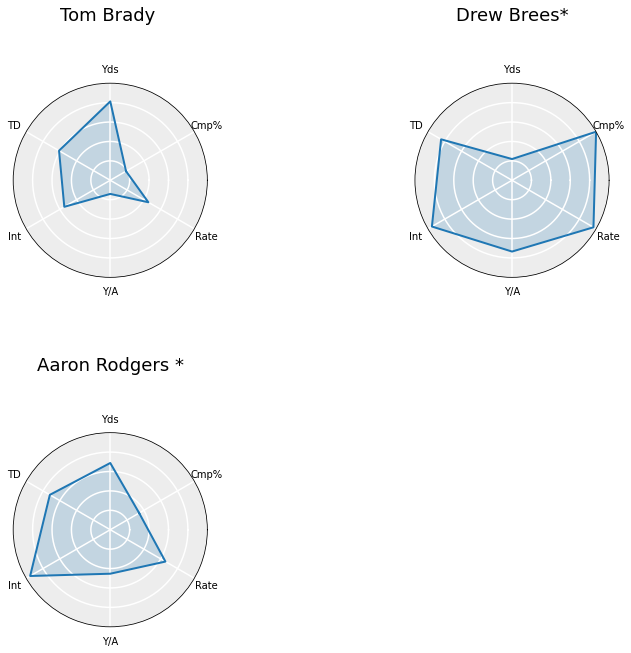

<Figure size 432x288 with 0 Axes>

In [43]:
fig = plt.figure(figsize=(12,10), facecolor='white')

ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')



#giving them space
plt.subplots_adjust(hspace=0.8, wspace=0.5)

ne_qb = qb_skills(pass_filt, 'NWE')
nola_qb = qb_skills(pass_filt, 'NOR')
gb_qb = qb_skills(pass_filt, 'GNB')



ax1 = chart_maker(ax1, angles, ne_qb)
ax2 = chart_maker(ax2, angles, nola_qb)
ax3 = chart_maker(ax3, angles, gb_qb)


plt.show()
plt.savefig('./Figures/Goats.pdf')

## Young stars of the league

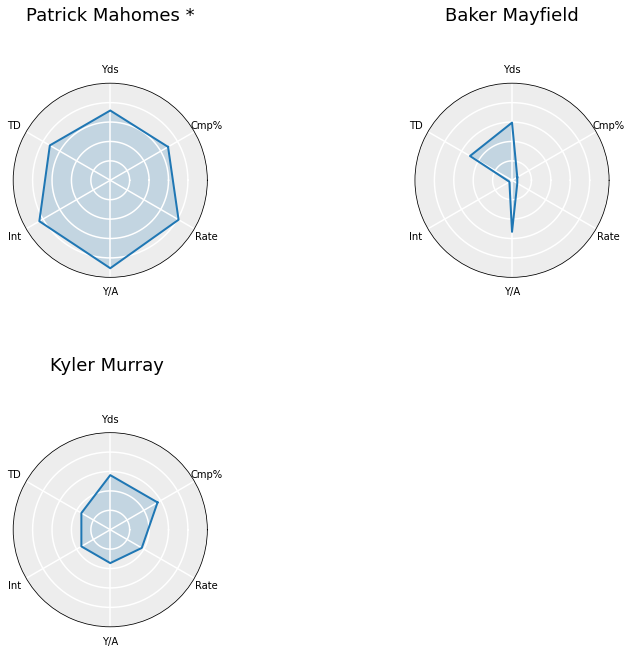

<Figure size 432x288 with 0 Axes>

In [42]:
fig = plt.figure(figsize=(12,10), facecolor='white')

ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')



#giving them space
plt.subplots_adjust(hspace=0.8, wspace=0.5)

ari_qb = qb_skills(pass_filt, 'ARI')
cle_qb = qb_skills(pass_filt, 'CLE')
kc_qb = qb_skills(pass_filt, 'KAN')



ax1 = chart_maker(ax1, angles, kc_qb)
ax2 = chart_maker(ax2, angles, cle_qb)
ax3 = chart_maker(ax3, angles, ari_qb)


plt.show()
plt.savefig('./Figures/YoungStars.pdf')